In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)

In [125]:
#Read in Data

#Cecum = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Cecum.rds")
#Digestive_gland= readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Digestive_gland.rds")
#Esophagus= readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Esophagus.rds")
#Gills= readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Gill.rds")
#Kidney= readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Kidney.rds")
#Intestine= readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Intestine.rds")
#Skin= readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Skin.rds")
#Stomach= readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Stomach.rds")

Water= readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Water.rds")
Shrimp= readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Shrimp.rds")
#Fecal= readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/SampleType/Fecal.rds")
#fecal_enviro = merge_phyloseq(Water,Shrimp,Fecal)
water_shrimp = merge_phyloseq(Water,Shrimp)

#control_diss = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/control_dissections.rds")
#treatment_diss = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/RDSfiles/treatment_dissections.rds")


In [127]:
write.csv(water_shrimp.mdf, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/water_shrimp.mdf.csv")

In [7]:
#control_diss.mdf = psmelt(control_diss)
saveRDS(control_diss.mdf, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/control_diss.mdf.rds")

#treatment_diss.mdf = psmelt(treatment_diss)
saveRDS(treatment_diss.mdf, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/treatment_diss.mdf.rds")


In [18]:
#conert ps objects to df

cecum.mdf = psmelt(Cecum)
digestivegland.mdf = psmelt(Digestive_gland)
esophagus.mdf = psmelt(Esophagus)
gills.mdf = psmelt(Gills)
kidney.mdf = psmelt(Kidney)
intestine.mdf = psmelt(Intestine)
skin.mdf = psmelt(Skin)
water.mdf = psmelt(Water)
shrimp.mdf = psmelt(Shrimp)
fecal.mdf = psmelt(Fecal)
fecal_enviro.mdf = psmelt(fecal_enviro)

saveRDS(cecum.mdf, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/cecum.mdf.rds")
saveRDS(digestivegland.mdf, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/digestivegland.mdf.rds")
saveRDS(esophagus.mdf, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/esophagus.mdf.rds")
saveRDS(gills.mdf, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/gills.mdf.rds")
saveRDS(kidney.mdf, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/kidney.mdf.rds")
saveRDS(intestine.mdf, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/intestine.mdf.rds")
saveRDS(skin.mdf, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/skin.mdf.rds")
saveRDS(water.mdf, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/water.mdf.rds")
saveRDS(shrimp.mdf, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/shrimp.mdf.rds")
saveRDS(fecal.mdf, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/fecal.mdf.rds")
saveRDS(fecal_enviro.mdf, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/fecal_enviro.mdf.rds")

In [19]:
all_sampletypes = rbind(cecum.mdf, digestivegland.mdf, esophagus.mdf, gills.mdf, kidney.mdf, intestine.mdf, skin.mdf)
all_data = rbind(cecum.mdf, digestivegland.mdf, esophagus.mdf, gills.mdf, kidney.mdf, intestine.mdf, skin.mdf, fecal_enviro.mdf)

saveRDS(all_sampletypes, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/all_sampletypes.mdf.rds")
saveRDS(all_data, "/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/all_data.mdf.rds")

In [3]:
#Read in df's

cecum.mdf = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/cecum.mdf.rds")
digestivegland.mdf = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/digestivegland.mdf.rds")
esophagus.mdf = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/esophagus.mdf.rds")
gills.mdf = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/gills.mdf.rds")
kidney.mdf = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/kidney.mdf.rds")
intestine.mdf = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/intestine.mdf.rds")
skin.mdf = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/skin.mdf.rds")
water.mdf = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/water.mdf.rds")
shrimp.mdf = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/shrimp.mdf.rds")
fecal.mdf = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/fecal.mdf.rds")
fecal_enviro.mdf = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/fecal_enviro.mdf.rds")
all_sampletypes = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/all_sampletypes.mdf.rds")
all_data = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/all_data.mdf.rds")
control_diss = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/control.diss.mdf.rds")
treatment_diss = readRDS("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/MDFfiles/treatment.diss.mdf.rds")

### Stacked Bar Charts

Selecting by m


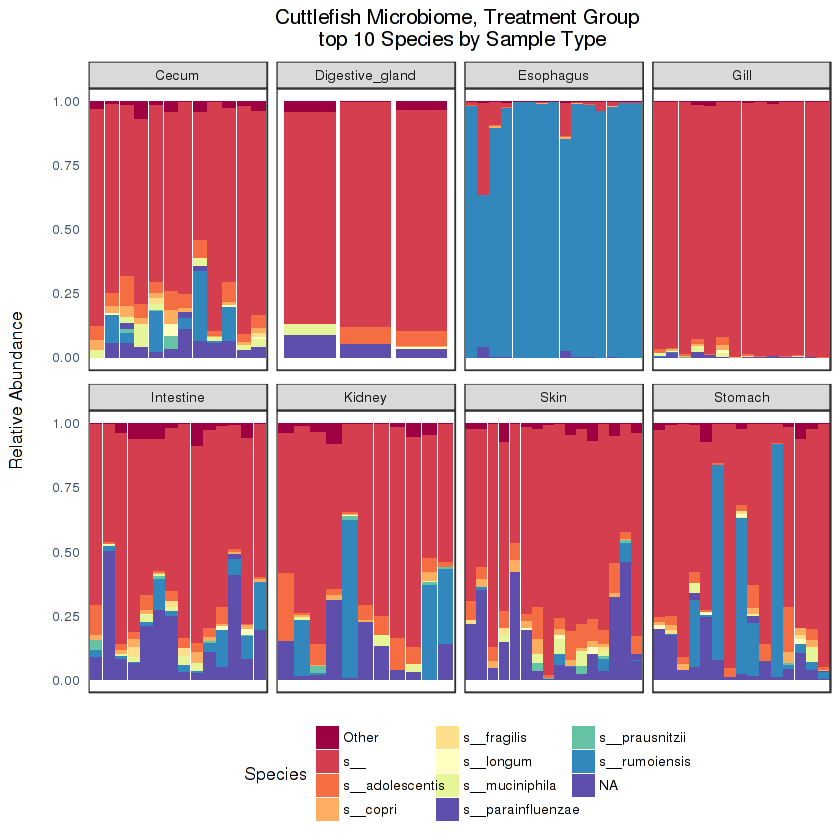

In [118]:
N = 10

topN = treatment_diss.mdf %>%
    group_by(Rank7) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank7) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank7")

treatment.other = treatment_diss.mdf %>%
    mutate(Phylum.other = ifelse(Rank7 %in% topN, as.character(Rank7), "Other")) %>%
    group_by(Sample, SampleType, Group, Phylum.other) %>%
    summarize(Abundance = sum(Abundance)) %>%
    arrange(Group)

treatment.summary = treatment.other %>%
    group_by(Phylum.other) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange((Phylum.other))
#treatment.summary


##################################
#     PLOT Relative Abundance    #
##################################


#treatment.other$Phylum.other <- factor(
#     treatment.other$Phylum.other, 
#     labels=c('Other   ', 'Actinobacteria   ', 'Bacteriodetes   ', 'Cyanobacteria   ', 'Firmicutes   ', 'Proteobacteria   ', 'Verrucomicrobia   '))

p = ggplot(treatment.other, aes(x= Sample, y = Abundance, fill = Phylum.other))
                        
#p = p + facet_grid(Group~SampleType, shrink = TRUE, scales = "free_x") #labeller = as_labeller("Phylum" = top))
p = p + facet_wrap(~SampleType, scales = "free_x", ncol = 4) #labeller = as_labeller("Phylum" = top))


p = p + ylab("Relative Abundance")

p = p + geom_bar(stat="identity")

#p = p + scale_fill_brewer(palette = "Spectral", na.value= "#0E024C") 

p = p +
scale_fill_manual(values=c(
"#9E0142", #other
"#D53E4F", #s_
"#F46D43", #s_adolescentis
"#FDAE61", #s_copri
"#FEE08C", #s_fragilis
"#FFFFBF", #s_longum /s_gnavus
"#E6F598", #s_muciniphila
"#5E4FAD", #s_parainfluenza
"#66C2A5", #s_prausnitzi
"#3288BD", #s_wittchi
"#ABDDA4"), #s_rumoiensis
#"#5E4FAD"), #
na.value="#5E4FAD")


p = p + guides(fill = guide_legend(title = "Species", nrow = 4, keywidth = 1, keyheight = 1))

p = p + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=10, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              #axis.text.x=element_text(angle=90,vjust=0.4),
              legend.key.size = unit(1, "mm"),
              legend.spacing.x = unit(1,"in"),
              axis.title.x=element_blank())
              

p = p + theme(legend.position="bottom") 

#p = p + theme(panel.spacing = unit(.5, "lines"))

p = p + ggtitle("Cuttlefish Microbiome, Treatment Group \n top 10 Species by Sample Type") + theme(plot.title = element_text(hjust = 0.5))


p

#### Piecharts broken down by treatment group and sample type

Selecting by m


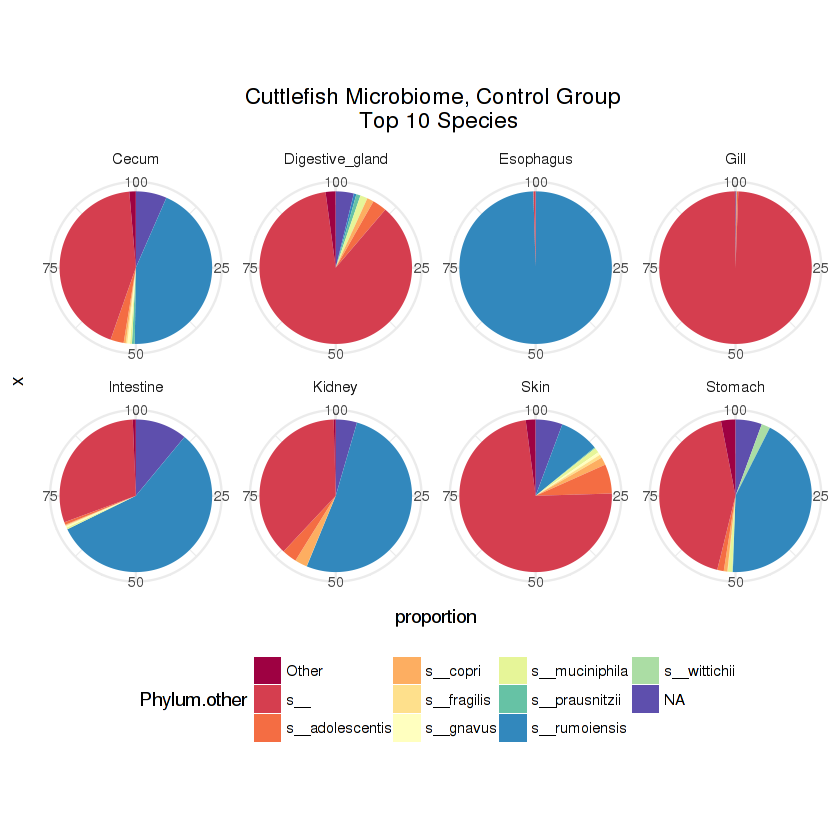

In [121]:
N = 10

topN = control_diss.mdf %>%
    group_by(Rank7) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank7) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank7")

control.other = control_diss.mdf %>%
    mutate(Phylum.other = ifelse(Rank7 %in% topN, as.character(Rank7), "Other")) %>%
    group_by(Sample, SampleType, Group, Phylum.other) %>%
    summarize(Abundance = sum(Abundance)) %>%
    arrange(Group)

control.summary = control.other %>%
    group_by(Phylum.other, SampleType) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange((Phylum.other))
#control.summary

#plot with pi-chart

#control.summary$Phylum.other <- factor(
#     control.summary$Phylum.other, 
#     labels=c('Other   ', 'Actinobacteria   ', 'Bacteriodetes   ', 'Cyanobacteria   ', 'Firmicutes   ', 'Proteobacteria   ', 'Verrucomicrobia   '))

control.p <- ggplot(control.summary, aes(x="", y=proportion, fill=Phylum.other)) +
geom_bar(stat = "identity", width = 1) + 
coord_polar("y", start=0) + 
facet_wrap(~SampleType, ncol=4) +
labs(title="Cuttlefish Microbiome, Control Group \n Top 10 Species")

control.p = control.p + theme_minimal() + theme(legend.position="bottom", plot.title = element_text(hjust = 0.5)) + 

#scale_fill_brewer(palette="Spectral", na.value="#0E024C")

scale_fill_manual(values=c(
"#9E0142", #other
"#D53E4F", #s_
"#F46D43", #s_adolescentis
"#FDAE61", #s_copri
"#FEE08C", #s_fragilis
"#FFFFBF", #s_longum /s_gnavus
"#E6F598", #s_muciniphila
#"#5E4FAD", #s_parainfluenza
"#66C2A5", #s_prausnitzi
"#3288BD", #s_wittchi
"#ABDDA4", #s_rumoiensis
"#5E4FAD"), #s_wittchii
#"#5E4FAD"), #
na.value="#5E4FAD")

control.p

#### Checking contaminants (from water, shrimp)

Selecting by m


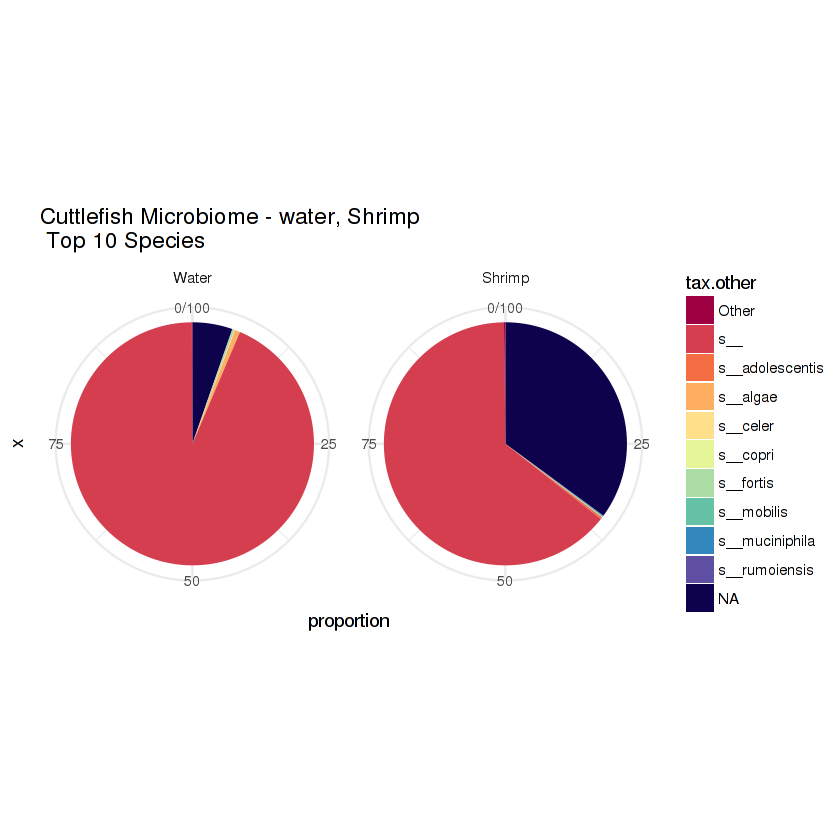

In [141]:
N = 10

topN = water_shrimp.mdf %>%
    group_by(Rank7) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank7) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank7")

water_shrimp.other = water_shrimp.mdf %>%
    mutate(tax.other = ifelse(Rank7 %in% topN, as.character(Rank7), "Other")) %>%
    group_by(Sample, SampleType, Group, tax.other) %>%
    summarize(Abundance = sum(Abundance)) %>%
    arrange(Group)

water_shrimp.summary = water_shrimp.other %>%
    group_by(tax.other, SampleType) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange((tax.other))
#water_shrimp.summary

#plot with pi-chart

#water_shrimp.summary$tax.other <- factor(
#     water_shrimp.summary$tax.other, 
#     labels=c('Other   ', 'Actinobacteria   ', 'Bacteriodetes   ', 'Cyanobacteria   ', 'Firmicutes   ', 'Proteobacteria   ', 'Verrucomicrobia   '))

water_shrimp.p <- ggplot(water_shrimp.summary, aes(x="", y=proportion, fill=tax.other)) +
geom_bar(stat = "identity", width = 1) + 
coord_polar("y", start=0) + 
facet_wrap(~SampleType) +
labs(title="Cuttlefish Microbiome - water, Shrimp \n Top 10 Species")

water_shrimp.p = water_shrimp.p + theme_minimal() + #+ theme(legend.position="bottom", plot.title = element_text(hjust = 0.5)) + 

scale_fill_brewer(palette="Spectral", na.value="#0E024C")

water_shrimp.p


## Plot relative abundance

In [3]:
batoral.mdf = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/new_batoral.mdf.rds")
batfecal.mdf = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/new_batfecal.mdf.rds")
batskin.mdf = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/new_batskin.mdf.rds")

In [23]:
mdffecal.summary.csv = write.csv(mdffecal.summary, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/CSVfiles/mdffecal.summary.csv")
mdforal.summary.csv = write.csv(mdforal.summary, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/CSVfiles/mdforal.summary.csv")
mdfskin.summary.csv = write.csv(mdfskin.summary, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/CSVfiles/mdfskin.summary.csv")

In [19]:
N = 10

topN = batfecal.mdf %>%
    group_by(Rank2) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank2) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank2")

mdffecal.other = batfecal.mdf %>%
    mutate(Phylum.other = ifelse(Rank2 %in% topN, as.character(Rank2), "Other")) %>%
    group_by(Sample, Phylum.other, Rank2) %>%
    summarize(Abundance = sum(Abundance)) %>%
    arrange(Abundance)

mdffecal.summary = mdffecal.other %>%
    group_by(Phylum.other) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange((Phylum.other))
mdffecal.summary

Selecting by m


Phylum.other,avg,sd,sem,proportion
Other,0.0001297315,0.002309862,2.402199e-05,0.01
p__Acidobacteria,0.0008994012,0.005596321,2.791191e-04,0.09
p__Actinobacteria,0.0142114124,0.043840463,2.186564e-03,1.42
p__Bacteroidetes,0.0086461870,0.050983460,2.542824e-03,0.86
p__Chlamydiae,0.0156188624,0.098128344,4.894197e-03,1.56
p__Cyanobacteria,0.0205847459,0.100645419,5.019737e-03,2.06
p__Firmicutes,0.2745326721,0.286389693,1.428382e-02,27.45
p__Fusobacteria,0.0193122359,0.089588324,4.468259e-03,1.93
p__Proteobacteria,0.6030790888,0.327061518,1.631235e-02,60.31
p__Tenericutes,0.0320390427,0.115452764,5.758260e-03,3.20


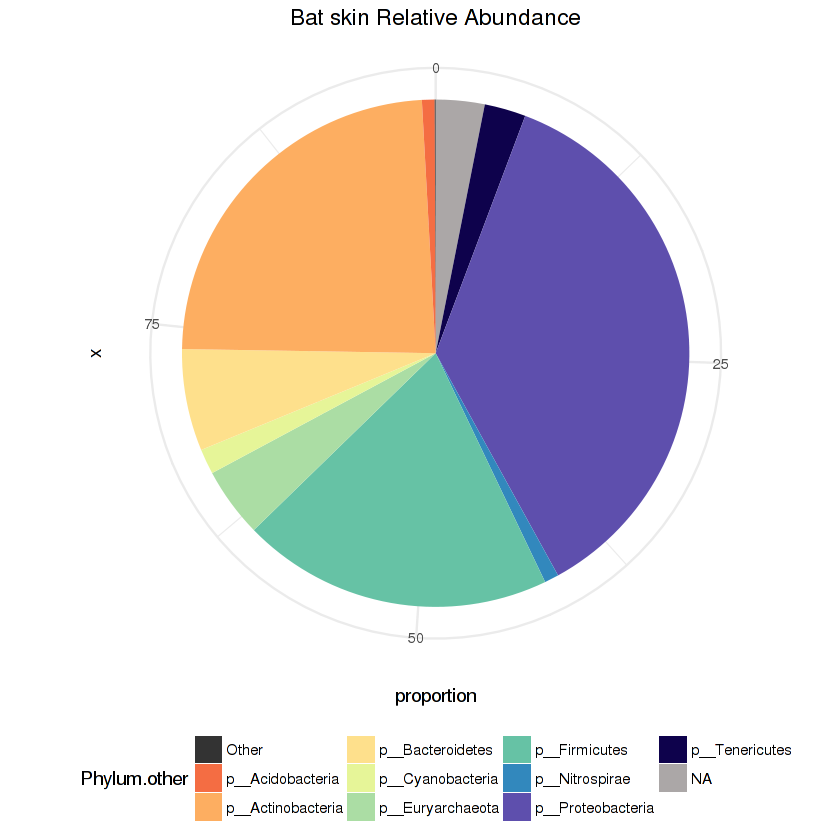

In [17]:
skin.p <- ggplot(mdfskin.summary, aes(x="", y=proportion, fill=Phylum.other)) +
geom_bar(stat = "identity", width = 1) +
coord_polar("y", start=0) + 
labs(title="Bat skin Relative Abundance")

skin.p = skin.p + theme_minimal() + theme(legend.position="bottom", plot.title = element_text(hjust = 0.5)) + 

#scale_fill_manual(values=c(
#"#333333",
#"#F46D43",
#"#FDAE61",
#"#FEE08C",
#"#E6F598",
#"#ABDDA4",
#"#66C2A5",
#"#3288BD",
#"#5E4FAD",
#"#0E024C"),
#na.value="#ABA7A7")

#scale_fill_brewer(palette="Spectral", na.value="#0E024C")

skin.p

## Oral

In [2]:
batoral.mdf = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/new_batoral.mdf.rds")

In [25]:
N = 25

topN = batoral.mdf %>%
    group_by(Rank7) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank7) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank7")

mdforal.other = batoral.mdf %>%
    mutate(Phylum.other = ifelse(Rank7 %in% topN, as.character(Rank7), "Other")) %>%
    group_by(Sample, Phylum.other, Rank7) %>%
    summarize(Abundance = sum(Abundance)) %>%
    arrange(Abundance)

mdforal.summary = mdforal.other %>%
    group_by(Phylum.other) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange((Phylum.other))
mdforal.summary

Selecting by m


Phylum.other,avg,sd,sem,proportion
Other,1.976565e-05,0.0003644712,1.629835e-06,0.00
s__,5.745971e-01,0.3568355198,1.840239e-02,57.46
s__adhaesivum,2.407237e-04,0.0014680136,7.570702e-05,0.02
s__adolescentis,2.251782e-04,0.0042825837,2.208574e-04,0.02
s__aureum,4.120662e-04,0.0028023168,1.445185e-04,0.04
s__flexus,2.639862e-04,0.0033526461,1.728995e-04,0.03
s__foraminis,2.769969e-04,0.0026306803,1.356670e-04,0.03
s__fragi,2.533885e-04,0.0035176795,1.814105e-04,0.03
s__garvieae,3.148136e-03,0.0157939361,8.145101e-04,0.31
s__johnsonii,1.983821e-03,0.0113525331,5.854622e-04,0.20


Warning message:
“Ignoring unknown aesthetics: y”

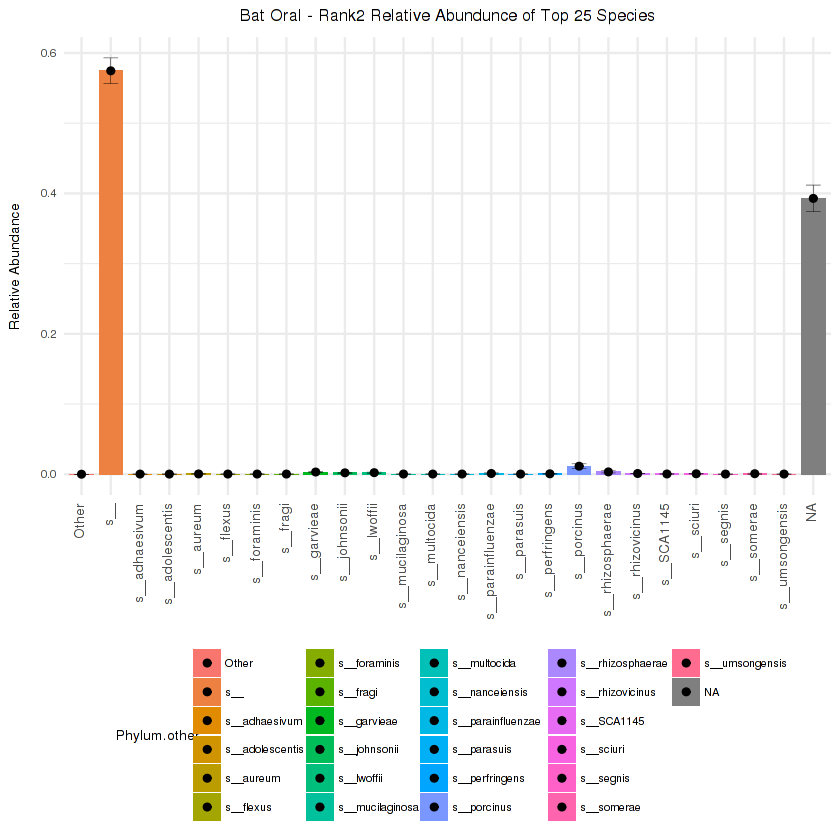

In [26]:
p2 = ggplot(mdforal.summary, aes(x= Phylum.other, y = avg, fill = Phylum.other)) 

#p2 = p2 + scale_fill_brewer(palette="Spectral")

#p2 = p2 + scale_fill_manual(values=c("#993366",
#                                     "#CC3366",
#                                    "#FF6666",
#                                     "#FFCC99",
#                                     "#99CC99",
#                                     "#3399CC",
#                                     "#666699"
#                                     ))

p2 = p2 + geom_bar(stat="identity", width=0.8, position = "dodge", na.rm = TRUE)

p2 = p2 + xlab("Phylum") + ylab("Relative Abundance") + theme(strip.text.y = element_text(angle = 90))

p2 = p2 + theme_minimal() + theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.25, size = 8),
                           text=element_text(size=8, color="black", family="Arial"),
                           legend.position="bottom",
                           axis.title.x=element_blank(),
                           axis.title.y=element_text(margin=margin(0,13,0,0)))

p2 = p2 + geom_point(aes(y = avg), data = mdforal.summary) +
    geom_errorbar(aes(y = avg, ymin = avg-(sem), ymax = avg+(sem)), 
                , color = "black", width = 0.5, size=.1, data = mdforal.summary)

#p2 = p2 + scale_y_continuous(limits = c(0, .7))

p2 = p2 + ggtitle("Bat Oral - Rank2 Relative Abundunce of Top 25 Species")

p2 = p2 + theme(plot.title = element_text(hjust = 0.5), legend.position="bottom")

p2

## Skin

## Rank Abundance of Subset Skin Samples - to pair with Network Analyses

In [3]:
miniskin = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/miniskin_mdf.rds")
hipposkin = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/hipposkin_mdf.rds")
rhinoskin = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/rhinoskin_mdf.rds")
pteroskin = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/pteroskin_.10.mdf.rds")

In [67]:
#miniskin_bact <- miniskin[which(miniskin$Rank2=='p__Actinobacteria'),]
#hipposkin_bact <- hipposkin[which(hipposkin$Rank2=='p__Spirochaetes'),]
#rhinoskin_bact <- rhinoskin[which(rhinoskin$Rank2=='p__Actinobacteria'),]
pteroskin_bact <- rhinoskin[which(pteroskin$Rank2=='p__Verrucomicrobia'),]

In [68]:
N = 6

topN = pteroskin_bact %>%
    group_by(Rank4) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank4) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank4")

mdforal.other = pteroskin_bact %>%
    mutate(Phylum.other = ifelse(Rank4 %in% topN, as.character(Rank4), "Other")) %>%
    group_by(Sample, Phylum.other, Rank4, Ecto_status) %>%
    summarize(Abundance = sum(Abundance)) %>%
    arrange(Abundance)

mdforal.summary = mdforal.other %>%
    group_by(Phylum.other, Ecto_status) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange((Phylum.other))

write.csv(mdforal.summary, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/Bdiv/Results_for_MS/RankAbundance/pteroskin_verrucomicrobia.csv")



Selecting by m


Warning message:
“Ignoring unknown aesthetics: y”

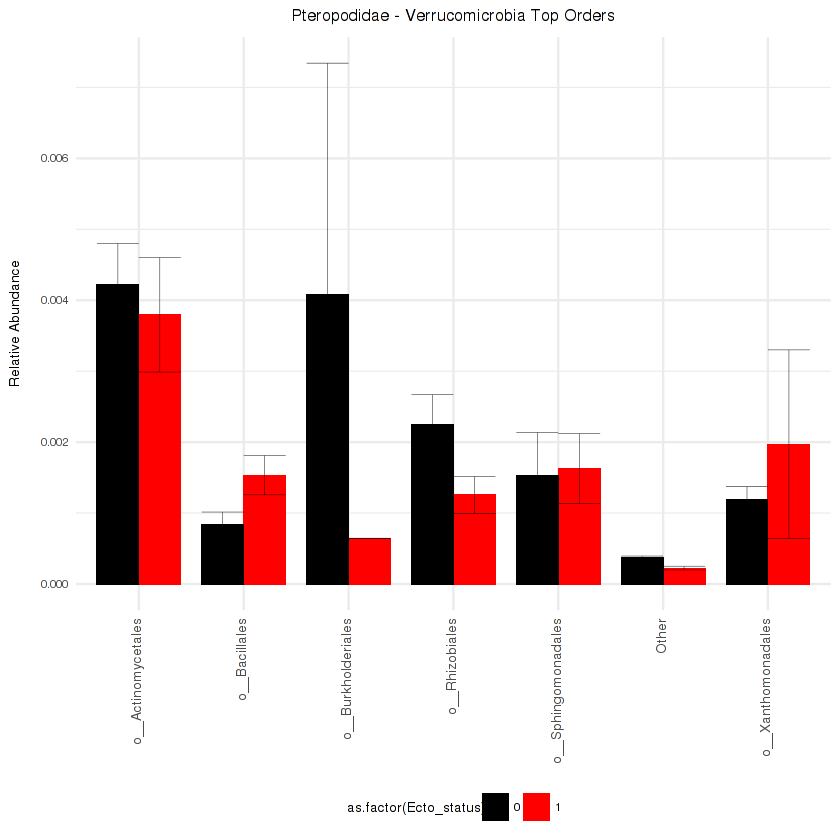

In [69]:
p2 = ggplot(mdforal.summary, aes(x= Phylum.other, y = avg, fill = as.factor(Ecto_status))) 

#p2 = p2 + scale_fill_brewer(palette="Spectral")

p2 = p2 + scale_fill_manual(values=c("black","red"))

p2 = p2 + geom_bar(stat="identity", width=.8, position = "dodge", na.rm = TRUE)

p2 = p2 + xlab("Phylum") + ylab("Relative Abundance") + theme(strip.text.y = element_text(angle = 90))

p2 = p2 + theme_minimal() + theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.25, size = 8),
                           text=element_text(size=8, color="black", family="Arial"),
                           legend.position="bottom",
                           axis.title.x=element_blank(),
                           axis.title.y=element_text(margin=margin(0,13,0,0)))

p2 = p2 + #geom_point(aes(y = avg), data = mdforal.summary) + 
    geom_errorbar(aes(y = avg, ymin = avg-(sem), ymax = avg+(sem)), 
                , color = "black", width = .8, size=.1, data = mdforal.summary, position = "dodge")

#p2 = p2 + scale_y_continuous(limits = c(0,.0001))

p2 = p2 + ggtitle("Pteropodidae - Verrucomicrobia Top Orders")

p2 = p2 + theme(plot.title = element_text(hjust = 0.5), legend.position="bottom")

p2

### Oral Microbiome and Malaria Infection Status

### Relative Abundance and Habitat "Quality"

In [14]:
miniskin = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/miniskin.rds")

In [24]:
#Get transformed sample data by genus & site
hipposkin = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/hipposkin.rds")

#subset by locality
#hipposkin_diatomite = subset_samples(hipposkin, Locality=="Diatomite cave Gilgil")
hipposkin_kaboga = subset_samples(hipposkin, Locality=="Kaboga cave Gede")
#hipposkin_kariandusi = subset_samples(hipposkin, Locality=="Kariandusi mines Gilgil")
#hipposkin_karamoja = subset_samples(hipposkin, Locality=="Karamoja Provence; Kaabong District; Mout Morungole; Uganda")
hipposkin_lionhill = subset_samples(hipposkin, Locality=="Lion Hill cave Lake Nakuru National Park")
hipposkin_lirhanda = subset_samples(hipposkin, Locality=="Lirhanda cave Kakamega Forest")
hipposkin_mahiakalo = subset_samples(hipposkin, Locality=="Mahiakalo cave Kakamega Forest")
hipposkin_makuruhu = subset_samples(hipposkin, Locality=="Makuruhu cave Gede")
hipposkin_pipeline = subset_samples(hipposkin, Locality=="Pipeline cave Gilgil")
hipposkin_makingeny = subset_samples(hipposkin, Locality=="Makingeny cave Mount Elgon National Park")

#remove empty OTUs
#hipposkin_diatomite = prune_taxa(taxa_sums(hipposkin_diatomite)>0, hipposkin_diatomite)
hipposkin_kaboga = prune_taxa(taxa_sums(hipposkin_kaboga)>0, hipposkin_kaboga)
#hipposkin_kariandusi = prune_taxa(taxa_sums(hipposkin_kariandusi)>0, hipposkin_kariandusi)
#hipposkin_karamoja = prune_taxa(taxa_sums(hipposkin_karamoja)>0, hipposkin_karamoja)
hipposkin_lionhill = prune_taxa(taxa_sums(hipposkin_lionhill)>0, hipposkin_lionhill)
hipposkin_lirhanda = prune_taxa(taxa_sums(hipposkin_lirhanda)>0, hipposkin_lirhanda)
hipposkin_mahiakalo = prune_taxa(taxa_sums(hipposkin_mahiakalo)>0, hipposkin_mahiakalo)
hipposkin_makuruhu = prune_taxa(taxa_sums(hipposkin_makuruhu)>0, hipposkin_makuruhu)
hipposkin_pipeline = prune_taxa(taxa_sums(hipposkin_pipeline)>0, hipposkin_pipeline)
hipposkin_makingeny = prune_taxa(taxa_sums(hipposkin_makingeny)>0, hipposkin_makingeny)

#saveRDS(hipposkin_diatomite, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/HQTfiles/hipposkin_diatomite.rds")
saveRDS(hipposkin_kaboga, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/HQTfiles/hipposkin_kaboga.rds")
#saveRDS(hipposkin_kariandusi, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/HQTfiles/hipposkin_kariandusi.rds")
#saveRDS(hipposkin_karamoja, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/HQTfiles/hipposkin_karamoja.rds")
saveRDS(hipposkin_lionhill, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/HQTfiles/hipposkin_lionhill.rds")
saveRDS(hipposkin_lirhanda, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/HQTfiles/hipposkin_lirhanda.rds")
saveRDS(hipposkin_mahiakalo, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/HQTfiles/hipposkin_mahiakalo.rds")
saveRDS(hipposkin_makuruhu, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/HQTfiles/hipposkin_makuruhu.rds")
saveRDS(hipposkin_makingeny, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/HQTfiles/hipposkin_makingeny.rds")
saveRDS(hipposkin_pipeline, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/HQTfiles/hipposkin_pipeline.rds")



In [61]:
#NATURAL
miniskin_kaboga = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/miniskin_kaboga.mdf")
miniskin_makuruhu = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/miniskin_makuruhu.mdf")
miniskin_mahiakalo = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/miniskin_mahiakalo.mdf")
#miniskin_makingeny = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/miniskin_makingeny.mdf")
#miniskin_lionhill = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/miniskin_lionhill.mdf")
miniskin_karamoja = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/miniskin_karamoja.mdf")


#MANMADE
miniskin_lirhanda = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/miniskin_lirhanda.mdf")
#miniskin_pipeline = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/miniskin_pipeline.mdf")
miniskin_diatomite = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/miniskin_diatomite.mdf")
miniskin_kariandusi = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/miniskin_kariandusi.mdf")



In [63]:
###minisideros

miniskin_natural = rbind(miniskin_kaboga, miniskin_makuruhu, miniskin_mahiakalo,miniskin_karamoja)
miniskin_manmade = rbind(miniskin_lirhanda,miniskin_diatomite,miniskin_kariandusi)

#Add column with header "HQ" and value "natural"
miniskin_natural['HQ']='natural'

#Add column with header "HQ" and value "manmade"
miniskin_manmade['HQ']='manmade'

HQT_miniskin = rbind(miniskin_natural, miniskin_manmade)

In [ ]:
###Hipposideros

hipposkin_natural = rbind(hipposkin_kaboga, hipposkin_makuruhu, hipposkin_mahiakalo,hipposkin_makingeny,hipposkin_lionhill)
hipposkin_manmade = rbind(hipposkin_lirhanda,hipposkin_pipeline)

#Add column with header "HQ" and value "natural"
hipposkin_natural['HQ']='natural'

#Add column with header "HQ" and value "manmade"
hipposkin_manmade['HQ']='manmade'

HQT_hipposkin = rbind(hipposkin_natural, hipposkin_manmade)

In [97]:
N = 8

topN = HQT_miniskin %>%
    group_by(Rank4) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank4) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank4")

miniskin.other = HQT_miniskin %>%
    mutate(Phylum.other = ifelse(Rank4 %in% topN, as.character(Rank4), "Other")) %>%
    group_by(Sample, Phylum.other, Rank4, HQ) %>%
    summarize(Abundance = sum(Abundance)) %>%
    arrange(Abundance)

miniskin.summary = miniskin.other %>%
    group_by(Phylum.other, HQ) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange((Phylum.other))

#write.csv(miniskin.summary, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/spiec_easi/HabitatQualityTests/RelAbundCSV/miniskin_HQT.Rank4.summary.csv")



Selecting by m


In [39]:
hipposkin.summary

Phylum.other,HQ,avg,sd,sem,proportion
Other,manmade,0.001414080,0.003446838,1.539934e-04,0.14
Other,natural,0.001212780,0.003126966,9.968404e-05,0.12
p__Acidobacteria,manmade,0.006664647,0.010700106,2.059236e-03,0.67
p__Acidobacteria,natural,0.005863369,0.006298029,8.819004e-04,0.59
p__Actinobacteria,manmade,0.201813359,0.088347329,1.700245e-02,20.18
p__Actinobacteria,natural,0.173931671,0.106261144,1.487954e-02,17.39
p__Bacteroidetes,manmade,0.086870216,0.060831431,1.170701e-02,8.69
p__Bacteroidetes,natural,0.072116592,0.050855548,7.121201e-03,7.21
p__Cyanobacteria,manmade,0.015836472,0.027991344,5.386937e-03,1.58
p__Cyanobacteria,natural,0.007300338,0.010054288,1.407882e-03,0.73


In [89]:
head(miniskin.summary)

Phylum.other,avg,sd,sem,proportion
o__Actinomycetales,0.25462954,0.15373066,0.014398196,25.46
o__Bacillales,0.12274259,0.12591482,0.011793003,12.27
o__Enterobacteriales,0.05634053,0.10582054,0.009911001,5.63
o__Flavobacteriales,0.02290037,0.03878311,0.003632371,2.29
o__Halobacteriales,0.08176566,0.13304870,0.012461152,8.18
o__Mycoplasmatales,0.02708711,0.06288865,0.005890062,2.71


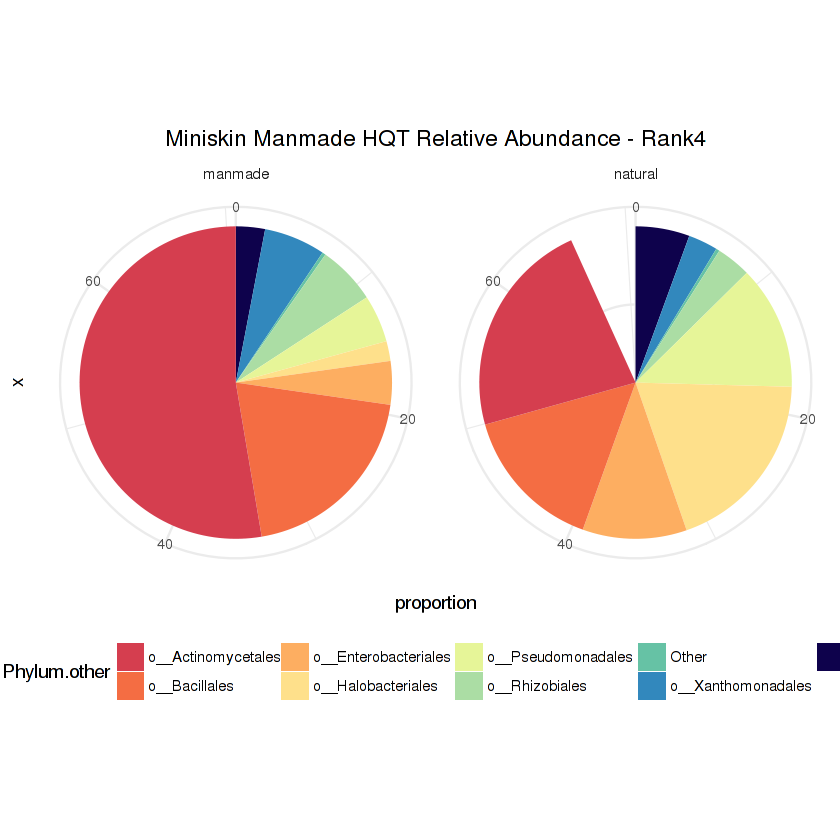

In [99]:
#Pie Plots of Natural Vs Manmade

skin.p <- ggplot(miniskin.summary, aes(x="", y=proportion, fill=Phylum.other)) + 
geom_bar(stat = "identity", width = 1) +
facet_wrap(~HQ) +
theme_minimal()


skin.p = skin.p + coord_polar("y", start=0) +
labs(title="Miniskin Manmade HQT Relative Abundance - Rank4")

skin.p = skin.p + theme(legend.position="bottom", plot.title = element_text(hjust = 0.5)) +

scale_fill_brewer(palette="Spectral", na.value="#0E024C")

#skin.p = skin.p + facet_wrap(~HQ)

#scale_fill_manual(values=c(
#"#333333",
#"#F46D43",
#"#FDAE61",
#"#FEE08C",
#"#E6F598",
#"#ABDDA4",
#"#66C2A5",
#"#3288BD",
#"#5E4FAD",
#"#0E024C"),
#na.value="#ABA7A7")



skin.p

In [98]:

#top = c('p__Acidobacteria' = "Acidobacteria",
#              'p__Actinobacteria' = "Actinoobacteria",
#              'p__Bacteriodetes' = "Bacteriodetes",
#              'p__Chlamydiae' = "Chlamydiae",
#              'p__Cyanobacteria' = "Cyanobacteria",
#              'p__Euryarcheota' = "Euryarcheota",
#              'p__Firmicutes' = "Firmicutes",
#              'p__Fusobacteria' = "Fusobacteria",
#              'p__Proteobacteria' = "Proteobacteria",
#              'p__Tenericutes' = "Tenericutes",
#              'Other' = "Other")


#miniskin.other$SampleType <- factor(
#     miniskin.other$SampleType, 
#     labels=c('Fecal','Skin','Oral'))

#miniskin.other$Phylum.other <- factor(
#     miniskin.other$Phylum.other, 
#     labels=c('Other   ', 'Acidobacteria   ','Actinobacteria   ', 'Bacteriodetes   ', 'Chlamydiae   ', 'Cyanobacteria   ', 'Euryarcheota   ', 'Firmicutes   ', 'Fusobacteria   ', 'Proteobacteria   ', 'Tenericutes   '))



p = ggplot(miniskin.other[order(miniskin.other$Phylum.other,decreasing=T),], aes(x=Sample, y = Abundance, fill = Phylum.other))


#p = ggplot(miniskin.other, aes(x=Sample, y = Abundance, fill = Phylum.other)) #+ 
            #labs(color = "Host Genus") + 
            #scale_fill_discrete(breaks=c("P__Acidobacteria","P__Actinobacteria","P__Bacteriodetes","P__Cyanobacteria","P__Firmicutes","P__Fusobacteria","P__Nitrospirae","P__Proteobacteria","P__Tenericutes"), labels=c("Acidobacteria","Actinobacteria","Bacteriodetes","Cyanobacteria","Firmicutes","Fusobacteria","Nitrospirae","Proteobacteria","Tenericutes")             
                        
p = p + facet_wrap(~HQ, shrink = TRUE, scales = "free")#, ncol = 10) #labeller = as_labeller("Phylum" = top))

p = p + ylab("Relative Abundance") 

p = p + geom_bar(stat="identity")

#p = p + scale_fill_brewer(palette = "Spectral")

p = p + scale_y_continuous(expand = c(0,0)) + scale_fill_brewer(palette = "Spectral", na.value= "#0E024C") 

p = p + guides(fill = guide_legend(title = "Phylum", nrow = 4, keywidth = 1, keyheight = 1))

p = p + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=10, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              #axis.text.x=element_text(angle=90,vjust=0.4),
              legend.key.size = unit(1, "mm"),
              legend.spacing.x = unit(1,"in"),
              axis.title.x=element_blank())
              

p = p + theme(legend.position="bottom") 

p = p + theme(panel.spacing = unit(.5, "lines"))

p = p + ggtitle("miniskin HQT Top 10 Classes") + theme(plot.title = element_text(hjust = 0.5))



#p = p + scale_x_discrete(labels=Samples,
 #                        breaks = c("X8530_G", "X8538_G", "C447_G","C394_PC","C446_PC",
  #                                 "C512_PC","C556_PC","C560_PC","X8553_PC","X8567_PC",
   #                                "X8508_TF","X8537_TF","T1EVA5_BP","C562_TF","C558_TF",
    #                                "C209_3_TF","X8509_G","C395_TF","C515_G"))

#p = p + scale_x_discrete(breaks=c("PC", "G", "TF","CF"),
#                      labels=c("Pyloric Ceaca", "Gonads", "Epidermis","Coelomic Fluid"))

p

ERROR: Error in ggplot(miniskin.other[order(miniskin.other$Phylum.other, decreasing = T), : object 'miniskin.other' not found


## Relative abundance and geography - pie charts for map figure

In [24]:
batoral = readRDS("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/MDFfiles/bats_oral.mdf.rds")

#add column to df and fill with data from existing column

batoral$map_locality<-batoral$Locality

In [25]:
#replace values in column with new values

#Uganda - A
batoral$map_locality[batoral$map_locality == "Aringa Bridge"] <- "A"
batoral$map_locality[batoral$map_locality == "Acholi Region; Lamwo District; Agoro-Agu Forest Reserve; Uganda"] <- "A"
batoral$map_locality[batoral$map_locality == "Karamoja Provence; Kaabong District; Mout Morungole; Uganda"] <- "A"

#Mt Elgon - B
batoral$map_locality[batoral$map_locality == "NA"] <- "B" #Kaptum Cave
batoral$map_locality[batoral$map_locality == "Kitum cave Mount Elgon National Park"] <- "B"
batoral$map_locality[batoral$map_locality == "Makingeny cave Mount Elgon National Park"] <- "B"

#Kakamega - B
batoral$map_locality[batoral$map_locality == "Mahiakalo cave Kakamega Forest"] <- "B"
batoral$map_locality[batoral$map_locality == "Buyangu KWS HQ Kakamega Forest National Reserve"] <- "B"
batoral$map_locality[batoral$map_locality == "Buzambuli Trail 3 Kakamega Forest National Reserve"] <- "B"
batoral$map_locality[batoral$map_locality == "Lirhanda cave Kakamega Forest"] <- "B"
batoral$map_locality[batoral$map_locality == "Ikhondo Junction Kakamega Forest National Reserve"] <- "B"

#Nakuru & Chyulu - C
batoral$map_locality[batoral$map_locality == "Diatomite cave Gilgil"] <- "C" 
batoral$map_locality[batoral$map_locality == "Kariandusi mines Gilgil"] <- "C" 
batoral$map_locality[batoral$map_locality == "Lion Hill cave Lake Nakuru National Park"] <- "C" 
batoral$map_locality[batoral$map_locality == "Pipeline cave Gilgil"] <- "C" 
batoral$map_locality[batoral$map_locality == "Monkey Bridge campsite Soysambu Conservancy"] <- "C" 
batoral$map_locality[batoral$map_locality == "Guano cave 3 Chyulu Hills National Park"] <- "C" 

#Kilifi - D
batoral$map_locality[batoral$map_locality == "Kaboga cave Gede"] <- "D"
batoral$map_locality[batoral$map_locality == "Makuruhu cave Gede"] <- "D"
batoral$map_locality[batoral$map_locality == "Watamu cave Gede"] <- "D"

In [26]:
N = 10

topN = batoral %>%
    group_by(Rank2) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank2) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank2")

batoral.other = batoral %>%
    mutate(Phylum.other = ifelse(Rank2 %in% topN, as.character(Rank2), "Other")) %>%
    group_by(Sample, Phylum.other, Rank2, map_locality) %>%
    summarize(Abundance = sum(Abundance)) %>%
    arrange(Abundance)

batoral.summary = batoral.other %>%
    group_by(Phylum.other, map_locality) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange((Phylum.other))

#write.csv(batoral.summary, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/spiec_easi/HabitatQualityTests/RelAbundCSV/batoral_HQT.Rank2.summary.csv")



Selecting by m


In [13]:
head(batskin.summary)

Phylum.other,map_locality,avg,sd,sem,proportion
Other,A,0.0006790489,0.0025672376,3.419945e-05,0.07
Other,B,0.0005825116,0.0049233131,7.332727e-05,0.06
Other,C,0.0006321008,0.0037579256,4.473721e-05,0.06
Other,D,0.0002767604,0.0009671293,1.564369e-05,0.03
p__Acidobacteria,A,0.0138390568,0.0182515866,1.701969e-03,1.38
p__Acidobacteria,B,0.0057700516,0.0061325386,6.393613e-04,0.58


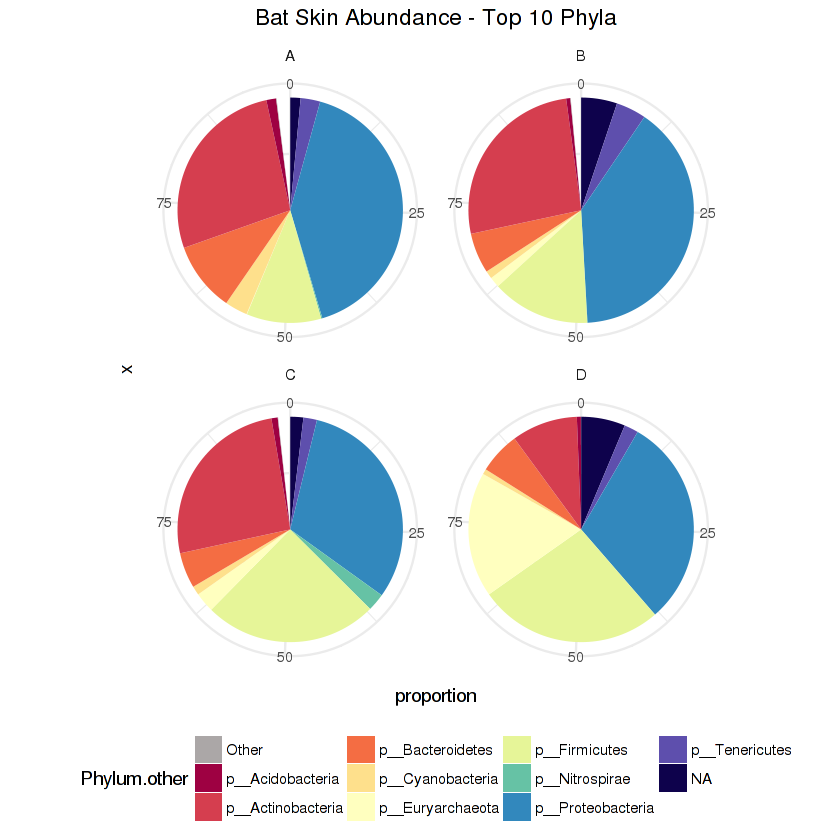

In [32]:
#Pie Plots of Natural Vs Manmade

skin.p <- ggplot(batskin.summary, aes(x="", y=proportion, fill=Phylum.other)) + 
geom_bar(stat = "identity", width = 1) +
facet_wrap(~map_locality) +
theme_minimal()


skin.p = skin.p + coord_polar("y", start=0) +
labs(title="Bat Skin Abundance - Top 10 Phyla")

skin.p = skin.p + theme(legend.position="bottom", plot.title = element_text(hjust = 0.5)) +

#scale_fill_brewer(palette="Spectral", na.value="#0E024C")

#skin.p = skin.p + facet_wrap(~HQ)

scale_fill_manual(values=c(
"#ABA7A7",    #Other
"#9E0142",    #Acidobacteria
"#D53E4F",    #Actinobacteria
"#F46D43",    #Bacteroidetes
#"#FDAE61",    #Chlamydiae
"#FEE08C",    #Cyanobacteria
"#FFFFBF",    #Euryarcheota
"#E6F598",    #Firmicutes
#"#ABDDA4",    #Fusobacteria
"#66C2A5",    #Nitrospirae           
"#3288BD",    #Proteobacteria
"#5E4FAD"),   #Tenericutes
na.value="#0E024C")



skin.p